In [31]:
# Intro. to DataScience
# Mini-Project

# Ali Saleem
# 23L-2638
# BDS-3B


In [2]:
# TASK:1 Data Loading and Preprocessing

In [4]:
import pandas as pd
import numpy as np


In [6]:
# Loading the dataset
data = pd.read_csv('WISDM_.csv')

# Basic information about the dataset
print("Dataset Information:")
data.info()
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19142 entries, 0 to 19141
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         19142 non-null  int64  
 1   Activity_Label  19142 non-null  object 
 2   Timestamp       19142 non-null  int64  
 3   X               19142 non-null  float64
 4   Y               19142 non-null  float64
 5   Z               19141 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 897.4+ KB

First 5 rows of the dataset:
   User_ID Activity_Label       Timestamp         X          Y             Z
0       33        Jogging  49105962326000 -0.694638  12.680544   0.50395286;
1       33        Jogging  49106062271000  5.012288  11.264028   0.95342433;
2       33        Jogging  49106112167000  4.903325  10.882658  -0.08172209;
3       33        Jogging  49106222305000 -0.612916  18.496431    3.0237172;
4       33        Jogging  49106

In [7]:
# Check for missing values
print("\nChecking for missing values: ")
missing_values = data.isnull().sum()
print(missing_values)


Checking for missing values: 
User_ID           0
Activity_Label    0
Timestamp         0
X                 0
Y                 0
Z                 1
dtype: int64


In [8]:
# Convert 'Z' column to float type, and remove semicolons
data['Z'] = data['Z'].str.replace(';', '').astype(float)

# Fill missing values with the mean of their column
# data = data.fillna(data.mean()) - I tried to fill with mean but the IDE crashes.

# Dropping rows with any NA if still there is any
data = data.dropna()


# Display updated datatypes
print("\nUpdated Dataset Information:")
data.info()



Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 19141 entries, 0 to 19140
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         19141 non-null  int64  
 1   Activity_Label  19141 non-null  object 
 2   Timestamp       19141 non-null  int64  
 3   X               19141 non-null  float64
 4   Y               19141 non-null  float64
 5   Z               19141 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
data['Timestamp'] = pd.to_numeric(data['Timestamp'], errors='coerce')
data['Timestamp'] = data['Timestamp'].round(4)

In [10]:
# Check for missing values again
print("\nChecking for missing values: ")
missing_values = data.isnull().sum()
print(missing_values)


Checking for missing values: 
User_ID           0
Activity_Label    0
Timestamp         0
X                 0
Y                 0
Z                 0
dtype: int64


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Use MinMaxScaler for normalization
scaler = MinMaxScaler()

# Fit and transform the acceleration columns
data[['X', 'Y', 'Z']] = scaler.fit_transform(data[['X', 'Y', 'Z']])

# Display the updated DataFrame Head with scaled features
print("\nDataFrame with scaled acceleration columns:")
print(data.head())


DataFrame with scaled acceleration columns:
   User_ID Activity_Label       Timestamp         X         Y         Z
0       33        Jogging  49105962326000  0.401228  0.791254  0.484655
1       33        Jogging  49106062271000  0.570188  0.748350  0.498721
2       33        Jogging  49106112167000  0.566962  0.736799  0.466326
3       33        Jogging  49106222305000  0.403648  0.967409  0.563512
4       33        Jogging  49106332290000  0.386712  0.773927  0.694373


In [12]:
# TASK: 2 Exploratory Data Analysis (EDA)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

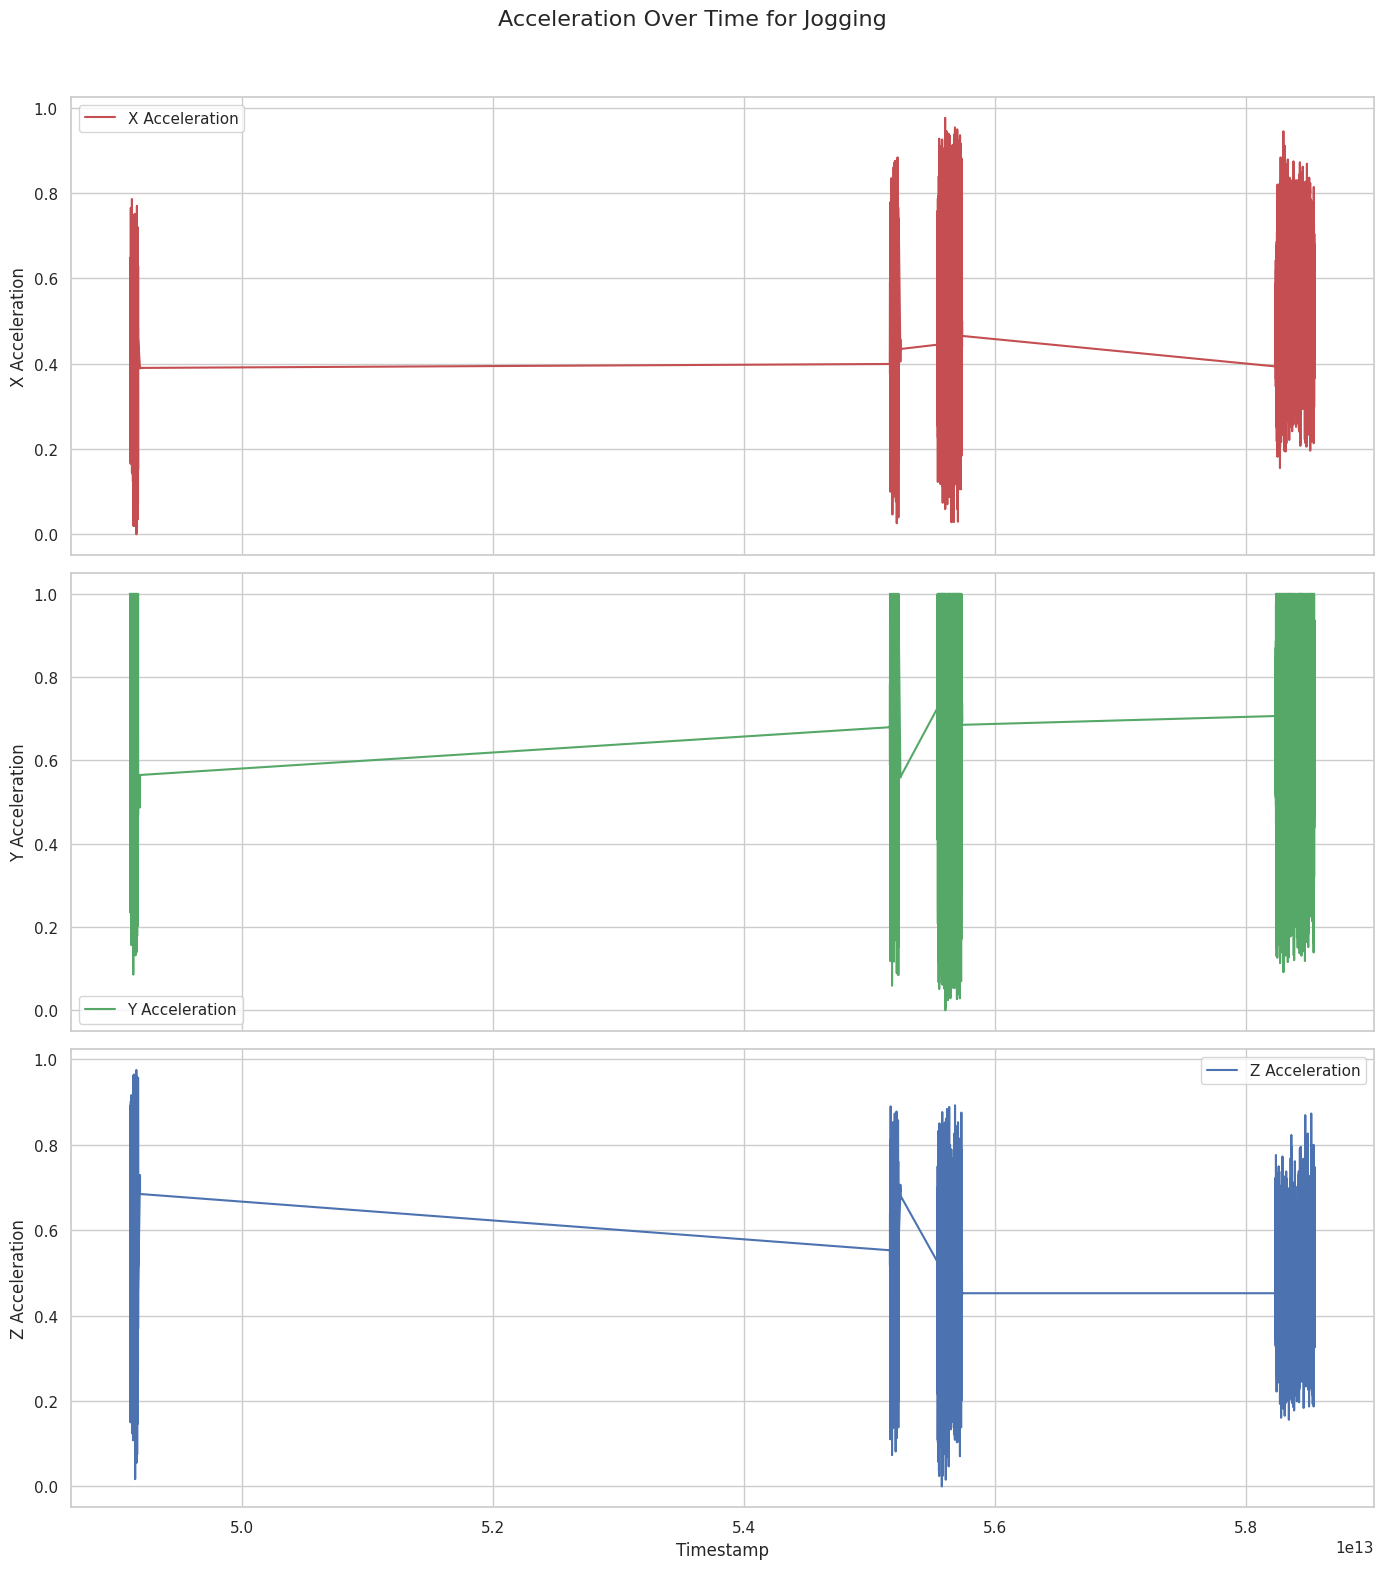

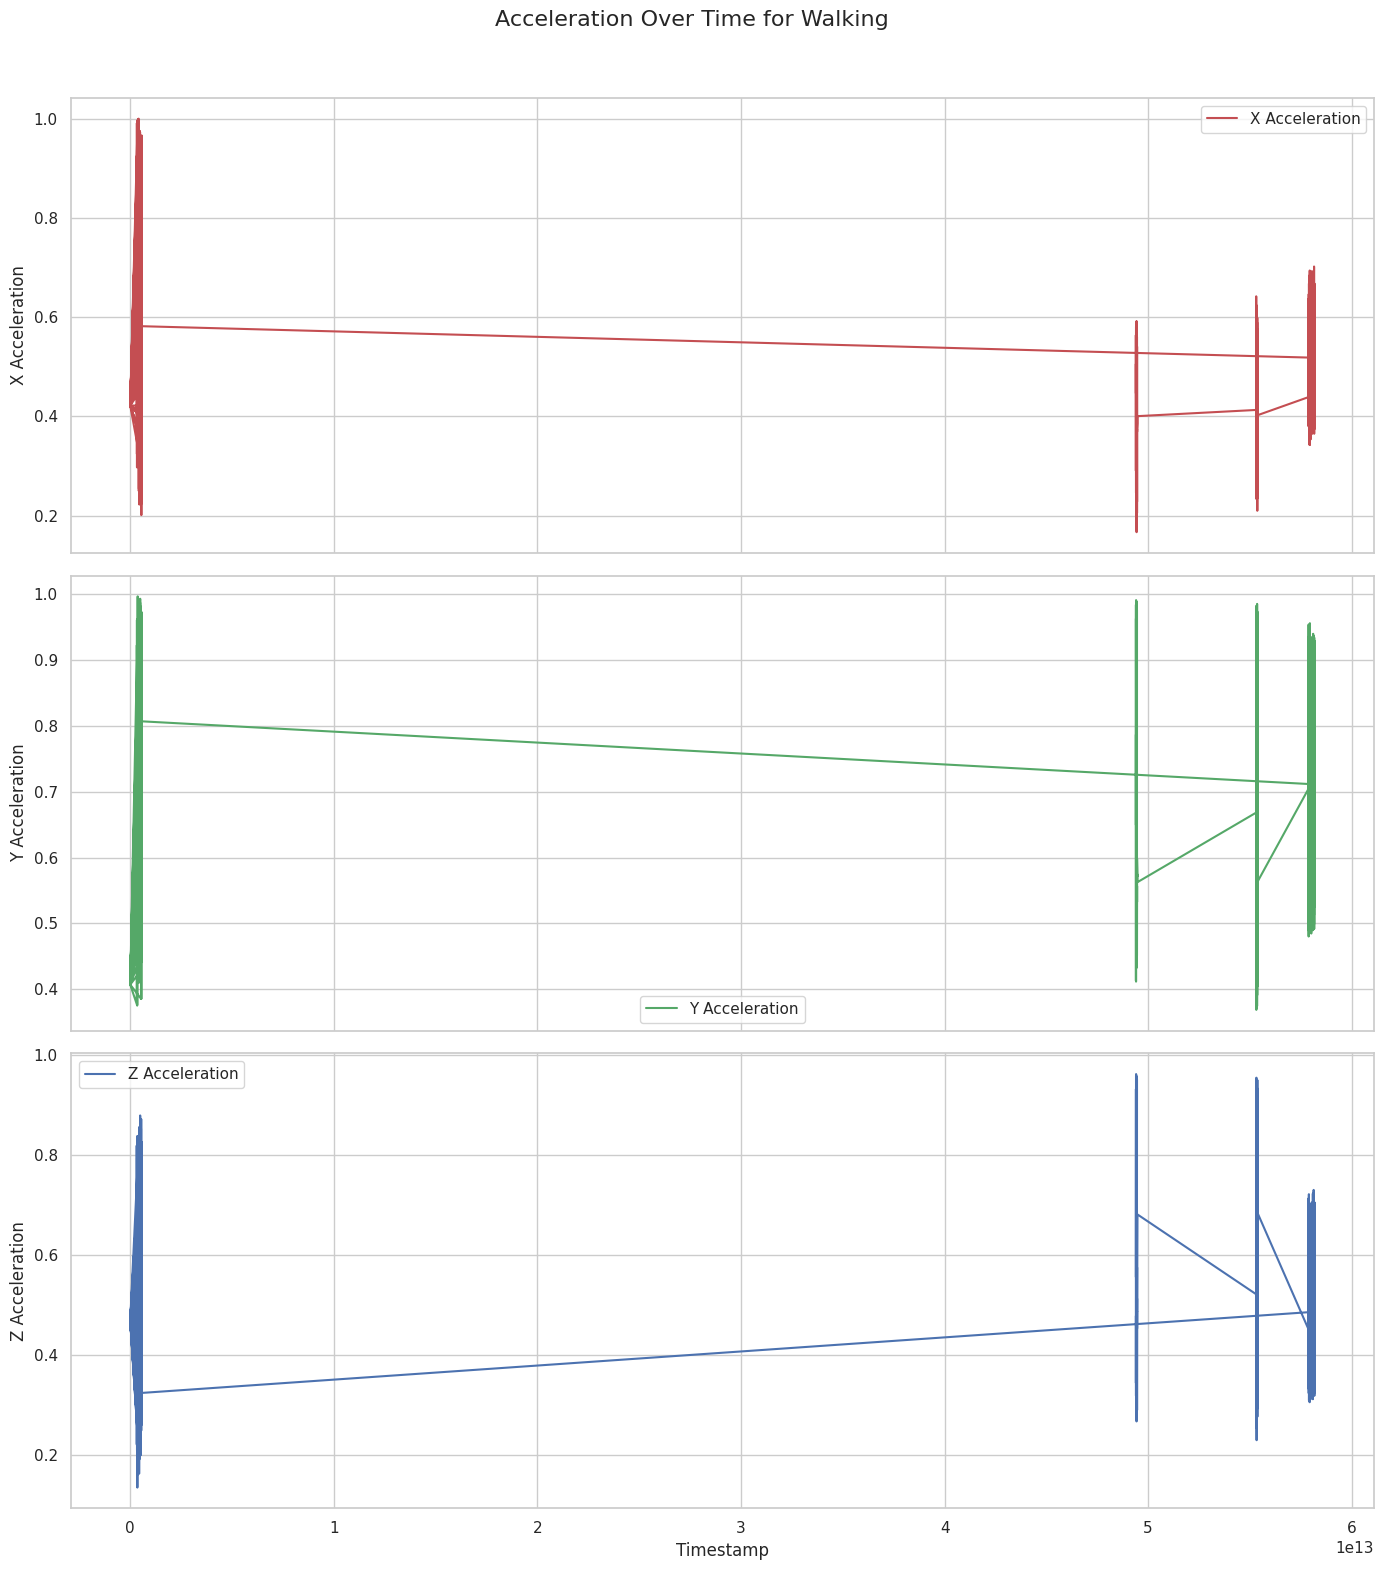

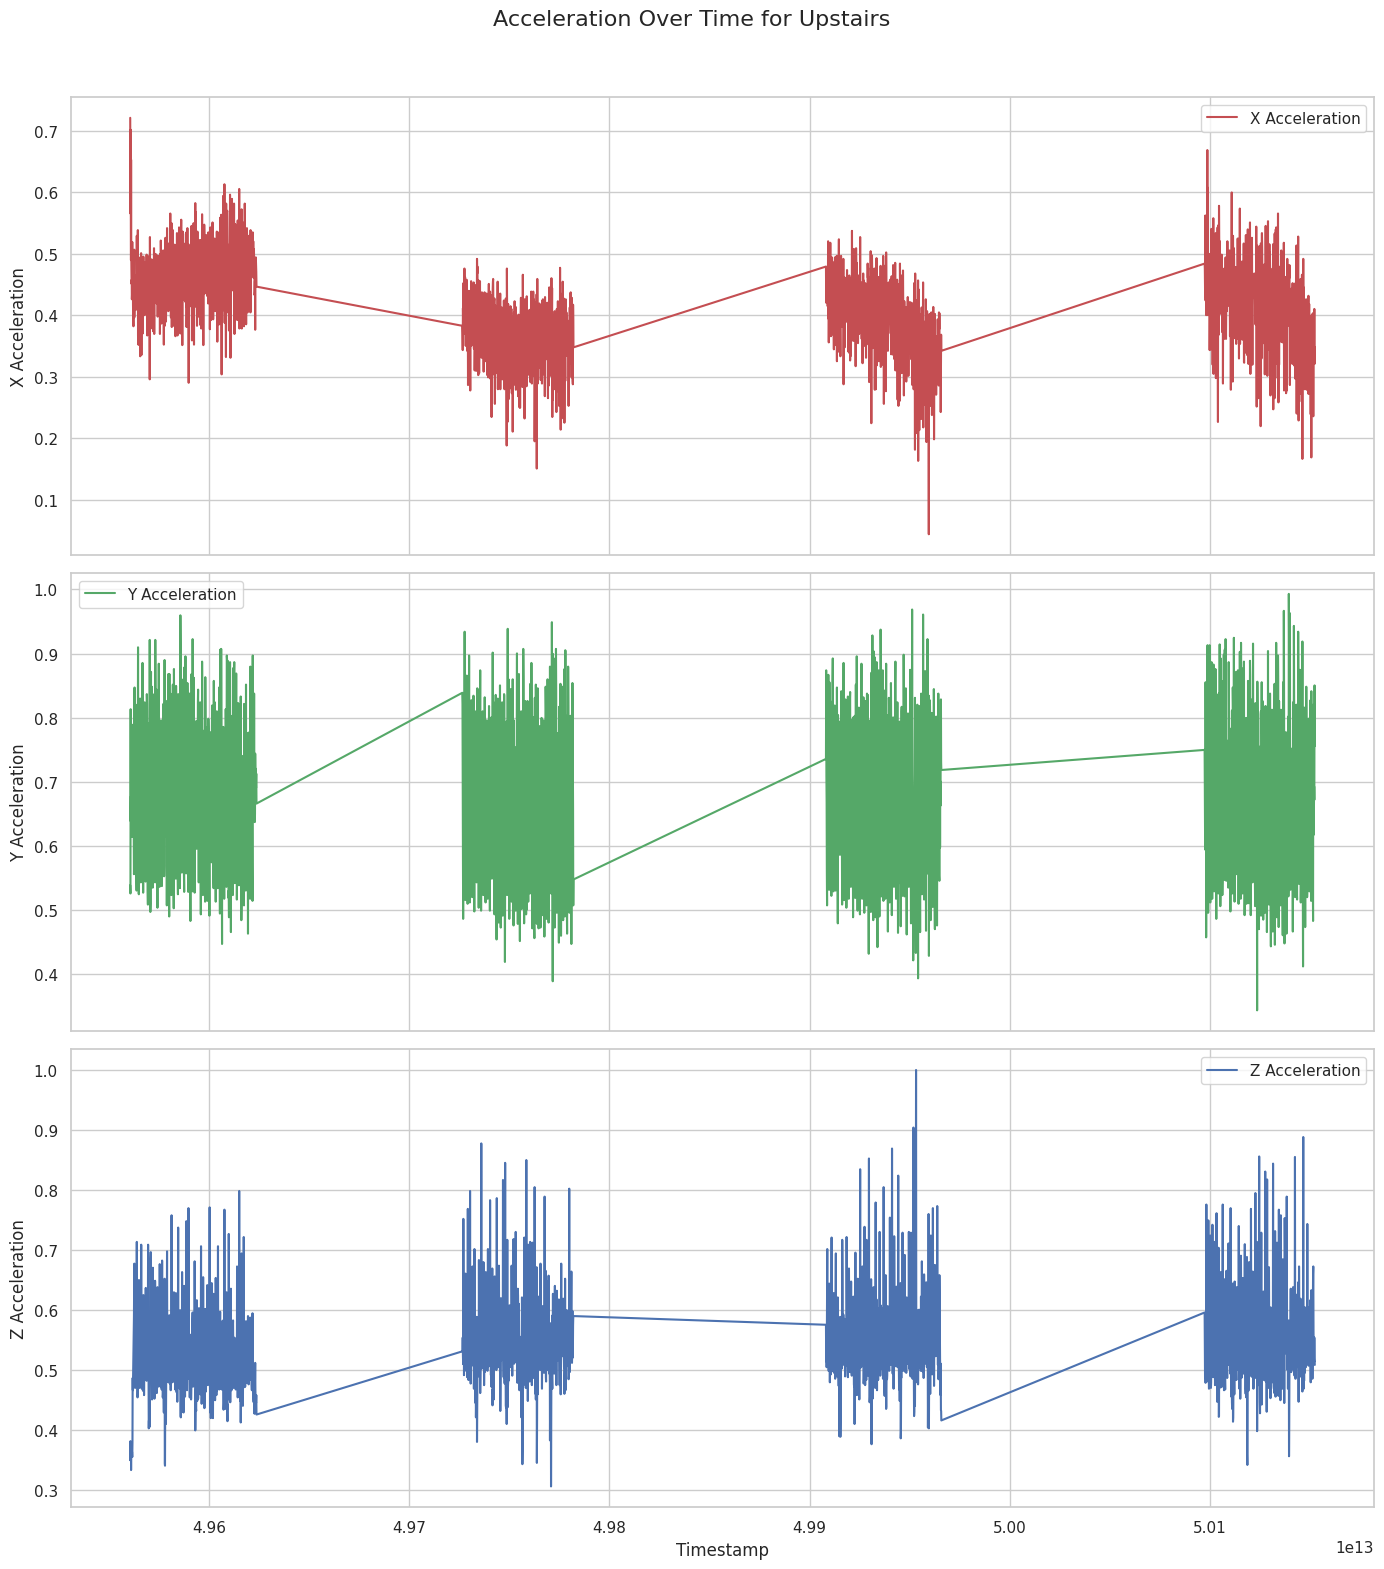

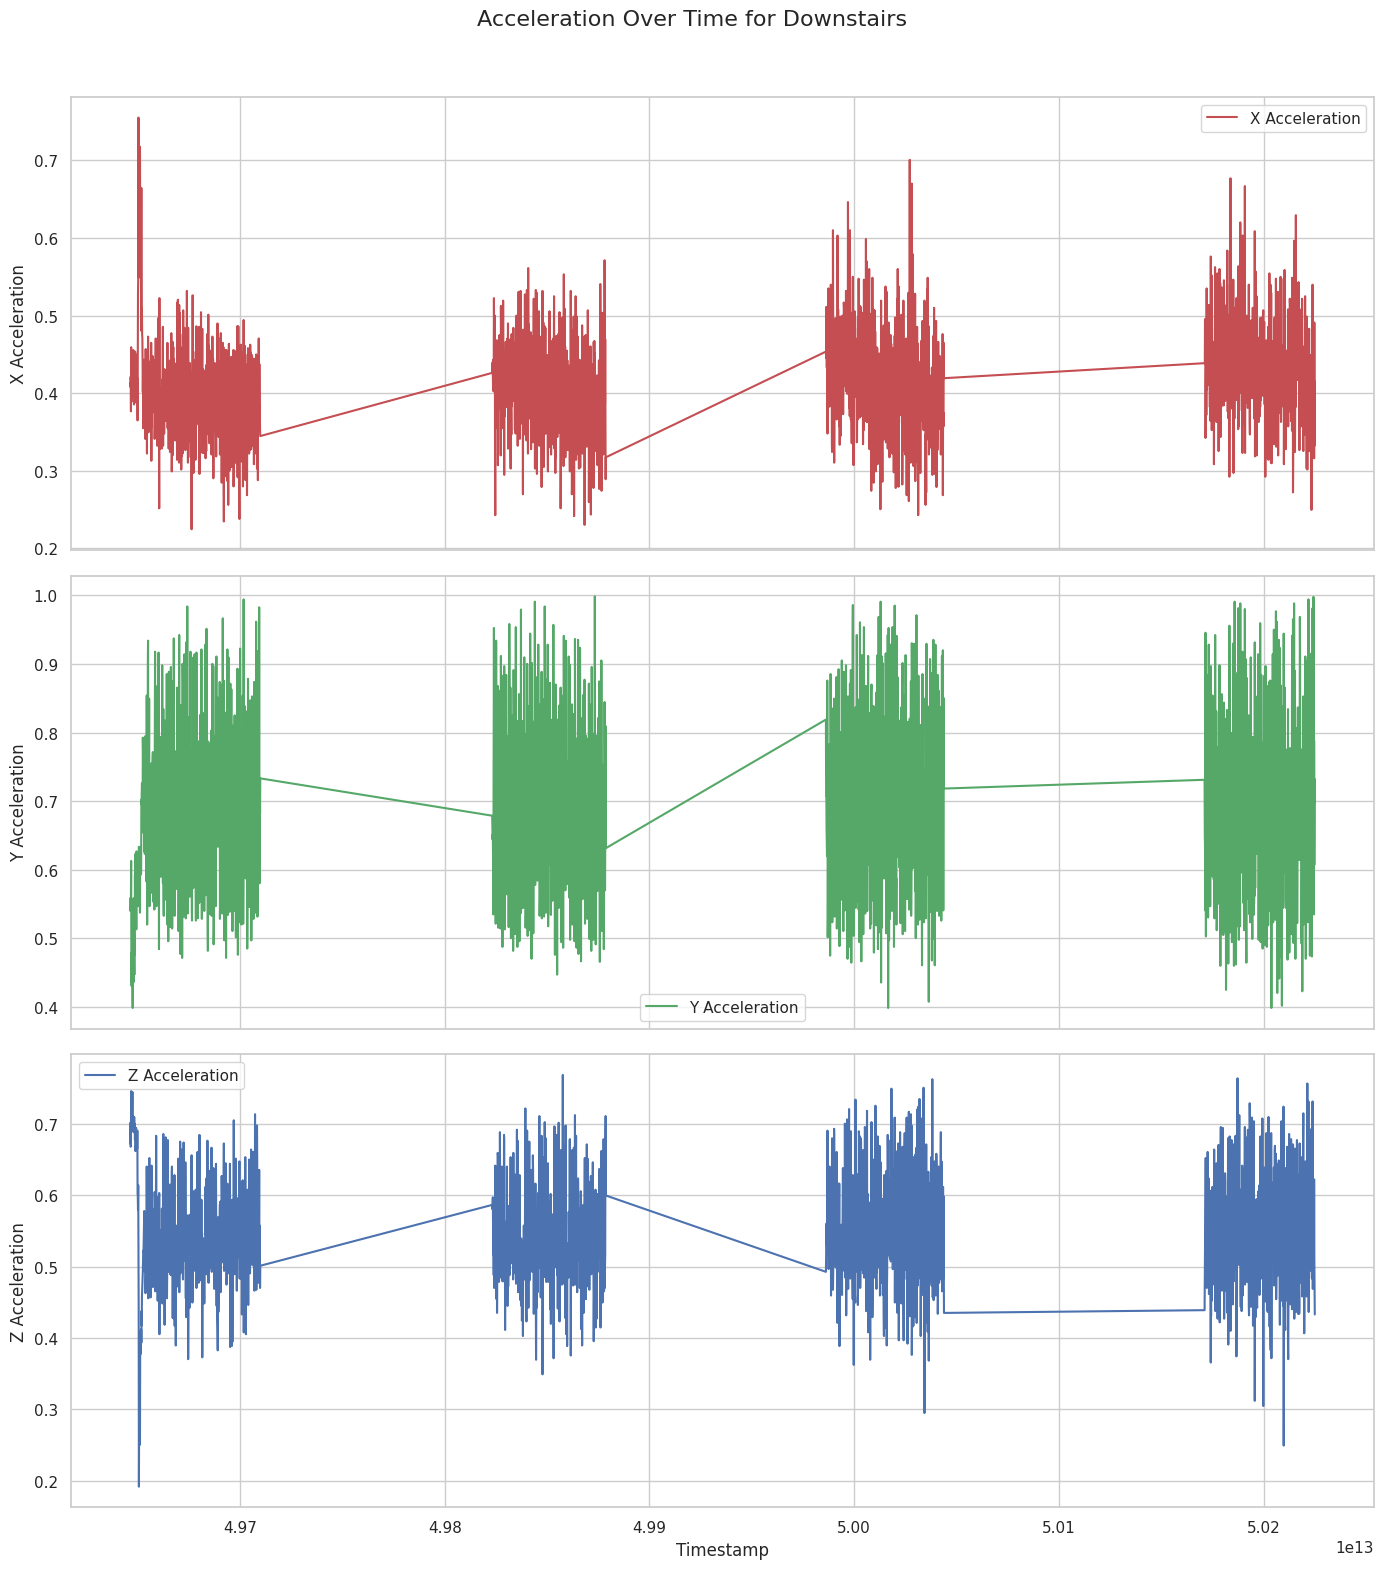

In [16]:
# Set style for seaborn
sns.set(style="whitegrid")

# Ploting X, Y, and Z accelerations over time
activities = data['Activity_Label'].unique()

for activity in activities:
    subset = data[data['Activity_Label'] == activity]
    fig, axes = plt.subplots(3, 1, figsize=(14, 16), sharex=True)

    # Plot X acceleration
    axes[0].plot(subset['Timestamp'], subset['X'], color='r', label='X Acceleration')
    axes[0].set_ylabel('X Acceleration')
    axes[0].grid(True)
    axes[0].legend()

    # Plot Y acceleration
    axes[1].plot(subset['Timestamp'], subset['Y'], color='g', label='Y Acceleration')
    axes[1].set_ylabel('Y Acceleration')
    axes[1].grid(True)
    axes[1].legend()

    # Plot Z acceleration
    axes[2].plot(subset['Timestamp'], subset['Z'], color='b', label='Z Acceleration')
    axes[2].set_xlabel('Timestamp')
    axes[2].set_ylabel('Z Acceleration')
    axes[2].grid(True)
    axes[2].legend()

    plt.suptitle(f'Acceleration Over Time for {activity}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [18]:
# Calculating statistics for each activity
activity_groups = data.groupby('Activity_Label')
activity_stats = activity_groups[['X', 'Y', 'Z']].agg(['mean', 'median', 'std'])

# Displaying the statistics
print("\nStatistics for each activity:")
activity_stats


Statistics for each activity:


X                             Y                      \
                    mean    median       std      mean    median       std   
Activity_Label                                                               
Downstairs      0.411862  0.406874  0.064028  0.677741  0.660066  0.118662   
Jogging         0.506042  0.515750  0.168891  0.678418  0.718234  0.238378   
Upstairs        0.413182  0.416148  0.070033  0.676720  0.669554  0.108503   
Walking         0.513237  0.502443  0.127864  0.692354  0.688862  0.123954   

                       Z                      
                    mean    median       std  
Activity_Label                                
Downstairs      0.542071  0.532396  0.074999  
Jogging         0.488621  0.495311  0.129973  
Upstairs        0.535536  0.521739  0.072856  
Walking         0.465680  0.447144  0.106953

In [19]:
# Calculate the magnitude of the acceleration vector
data['Magnitude'] = np.sqrt(data['X']**2 + data['Y']**2 + data['Z']**2)

# Display the updated DataFrame with the magnitude column
print("\nDataFrame with magnitude column:")
print(data.head())


DataFrame with magnitude column:
   User_ID Activity_Label       Timestamp         X         Y         Z  \
0       33        Jogging  49105962326000  0.401228  0.791254  0.484655   
1       33        Jogging  49106062271000  0.570188  0.748350  0.498721   
2       33        Jogging  49106112167000  0.566962  0.736799  0.466326   
3       33        Jogging  49106222305000  0.403648  0.967409  0.563512   
4       33        Jogging  49106332290000  0.386712  0.773927  0.694373   

   Magnitude  
0   1.010919  
1   1.064831  
2   1.040085  
3   1.190109  
4   1.109353  


In [20]:
# Task:3  Model 1 - K-Nearest Neighbors (KNN) Classification

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [22]:
x = data[['X', 'Y', 'Z']]
y = data['Activity_Label']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training data, 20% testing data

# Experimenting with different values of K
k_values = [3, 5, 7, 9]
best_k = None
best_accuracy = 0

for k in k_values:
    # Initialize and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') # Using weighted average for multi-clas
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"Results for k = {k}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print("\n")

    # Update best_k if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nBest K value: {best_k} with accuracy: {best_accuracy:.4f}")

Results for k = 3:
  Accuracy: 0.7015
  Precision: 0.7037
  Recall: 0.7015


Results for k = 5:
  Accuracy: 0.7119
  Precision: 0.7110
  Recall: 0.7119


Results for k = 7:
  Accuracy: 0.7224
  Precision: 0.7207
  Recall: 0.7224


Results for k = 9:
  Accuracy: 0.7232
  Precision: 0.7205
  Recall: 0.7232



Best K value: 9 with accuracy: 0.7232


In [23]:
# Task 4:  Model 2 - K-Means Clustering

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

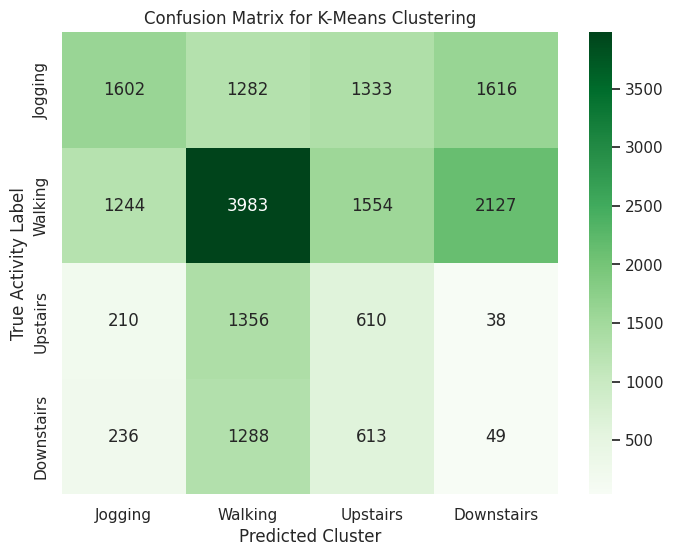

In [25]:
X_cluster = data[['X', 'Y', 'Z']]

# Determining the number of clusters (K)
k = len(data['Activity_Label'].unique())

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_cluster)
cluster_labels = kmeans.labels_

# Convertintg cluster_labels to string type to match Activity_Label
cluster_labels = cluster_labels.astype(str)

# Get unique activity labels
unique_activity_labels = data['Activity_Label'].unique()

# Create a mapping from cluster labels to activity labels
cluster_to_activity_mapping = {str(i): label for i, label in enumerate(unique_activity_labels)}

# Map cluster labels to activity labels
mapped_cluster_labels = np.vectorize(cluster_to_activity_mapping.get)(cluster_labels)


# Compare clusters to true labels using a confusion matrix
conf_matrix = confusion_matrix(data['Activity_Label'], mapped_cluster_labels, labels=unique_activity_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=unique_activity_labels,
            yticklabels=unique_activity_labels)
plt.xlabel('Predicted Cluster')
plt.ylabel('True Activity Label')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

In [26]:
# Based on the generated confusion matrix, it appears that K-Means clustering had mixed results in grouping similar activities. While some activities were clustered effectively, there were instances of misclassifications, particularly between jogging and walking.
# While K-Means clustering showed some success in grouping certain activities, it struggled to effectively separate activities with similar movement patterns, such as jogging and walking. To improve performance, further exploration of feature engineering, distance metrics, and the choice of K is recommended. Additionally, alternative clustering algorithms like K-Medoids could be considered for their robustness to outliers and noise, which might be present in the data.


In [27]:
# Task 5 Model 3 - Support Vector Machine (SVM) Classification

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score


In [30]:
label_encoder = LabelEncoder()
data['Activity_Label'] = label_encoder.fit_transform(data['Activity_Label'])

# Separate features (X, Y, Z) and labels (Activity_Label)
X = data[['X', 'Y', 'Z']]
y = data['Activity_Label']

# Scale the feature values for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and Evaluate SVM Models with Different Kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Results for {kernel} kernel:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("-" * 50)

# Hyperparameter Tuning for RBF Kernel
print("Tuning hyperparameters for RBF kernel...")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearch
print("Best parameters:", grid_search.best_params_)

# Train the best SVM model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the final model
print("Evaluation of the best RBF SVM model:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Training SVM with linear kernel...
Results for linear kernel:
Accuracy: 0.4732306085139723
Precision: 0.3344375085371854
Recall: 0.4732306085139723
--------------------------------------------------
Training SVM with poly kernel...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for poly kernel:
Accuracy: 0.5395664664403238
Precision: 0.5148562053348668
Recall: 0.5395664664403238
--------------------------------------------------
Training SVM with rbf kernel...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for rbf kernel:
Accuracy: 0.6944371898668059
Precision: 0.701577263423657
Recall: 0.6944371898668059
--------------------------------------------------
Tuning hyperparameters for RBF kernel...
Best parameters: {'C': 1, 'gamma': 10}
Evaluation of the best RBF SVM model:
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.48      0.52       440
           1       0.83      0.71      0.77      1200
           2       0.54      0.45      0.49       442
           3       0.76      0.89      0.82      1747

    accuracy                           0.74      3829
   macro avg       0.67      0.63      0.65      3829
weighted avg       0.73      0.74      0.73      3829

Accuracy: 0.7377905458344215
Precision: 0.733320906384396
Recall: 0.7377905458344215
